In [11]:
def get_random_points(a, b, n):
    x = list()
    for i in range(n):
        temp = random.uniform(a, b)
        x.append(temp)
    return x

In [17]:
def get_desired_points(X):
    d = list()
    for x1,x2 in X:
        if (x2 < 1/5 * math.sin(10*x1) + 0.3) or ((x2 - 0.8)**2 + (x1 - 0.5)**2 < (0.15)**2):
            d.append(1)
        else:
            d.append(-1)
    return d

In [484]:
# test scenario
def get_x_test():
    x = [[1,1],[2,2],[-1,-1],[-1,-2],[-2,0]]
    return x

In [553]:
# test scenario
C_p = [[1,1],[2,2]]
C_n = [[-1,-1],[-1,-2],[-2,0]]
def get_d_test(X):
    d = list()
    for x in X:
        if x in C_p:
            d.append(1)
        if x in C_n:
            d.append(-1)
    return d

In [13]:
def linear_kernel(xi,xj):
    return np.dot(xi.T,xj)

In [14]:
def polynomial_kernel(Xi,Xj,d):
    return (1 + np.dot(Xi.T,Xj))**d

In [453]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

In [224]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [225]:
def gaussian_kernel(Xi,Xj,sigma):
    return math.exp(-(norm(Xi - Xj)**2/sigma**2))

In [223]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [165]:
from cvxopt import solvers, matrix

In [387]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [414]:
X1 = get_random_points(0, 1, 100)
X2 = get_random_points(0, 1, 100)
X = [[ele1,ele2] for ele1,ele2 in zip(X1,X2)]
D = get_desired_points(X)

In [592]:
X =  get_x_test()
D = get_d_test(X)

In [593]:
X

[[1, 1], [2, 2], [-1, -1], [-1, -2], [-2, 0]]

In [496]:
D

[1, 1, -1, -1, -1]

In [455]:
d=3

In [499]:
P = []
for i in range(len(D)):
    row = []
    for j in range(len(D)):
        temp = D[i] * D[j] * linear_kernel(np.array(X[i]),np.array(X[j]))
        row.append(temp)
    P.append(row)

In [518]:
P = matrix(np.array(P), (len(D),len(D)), 'd')
P

<5x5 matrix, tc='d'>

In [519]:
p = np.matrix(P)
check_symmetric(p)

True

In [520]:
q = matrix(-1 * np.ones(len(D)))

In [521]:
h = matrix(np.zeros(len(D)))

In [522]:
G = matrix(-1 * np.eye(len(D))) ##

In [523]:
b = matrix([0], (1,1), 'd')

In [524]:
A = matrix(D, (1,len(D)) , 'd')

In [525]:
sol=solvers.qp( P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -4.2095e-01 -8.9611e-01  9e+00  3e+00  1e+00
 1: -5.5152e-02 -7.2792e-01  7e-01  3e-16  4e-16
 2: -2.2452e-01 -2.8979e-01  7e-02  6e-17  2e-16
 3: -2.4687e-01 -2.5283e-01  6e-03  6e-17  1e-16
 4: -2.4973e-01 -2.5027e-01  5e-04  3e-17  8e-17
 5: -2.4996e-01 -2.5004e-01  8e-05  3e-17  7e-17
 6: -2.4999e-01 -2.5001e-01  1e-05  6e-17  2e-16
 7: -2.5000e-01 -2.5000e-01  2e-06  6e-17  2e-16
 8: -2.5000e-01 -2.5000e-01  2e-07  4e-17  1e-16
Optimal solution found.


In [526]:
print(sol['x'])

[ 2.50e-01]
[ 3.90e-09]
[ 2.50e-01]
[ 7.80e-09]
[ 3.19e-04]



In [527]:
alpha = np.array(list(sol['x']))

In [528]:
alpha[::-1]

array([3.18614924e-04, 7.79872461e-09, 2.49681377e-01, 3.89859258e-09,
       2.49999996e-01])

In [529]:
#filtering for best 10
k = alpha.argsort()[::-1][:10]

In [611]:
# taking one support vector
K = k[0]

In [532]:
for i in range(len(D)):
    temp += - alpha[i] * D[i] * linear_kernel(np.array(X[i]),np.array(X[K]))
theta = D[K] - temp

In [533]:
theta

5.00000045226209

In [534]:
alpha

array([2.49999996e-01, 3.89859258e-09, 2.49681377e-01, 7.79872461e-09,
       3.18614924e-04])

#### g(x)

In [547]:
gx = list()
for j in range(len(D)):
    temp = 0
    for i in range(len(D)):
        temp += alpha[i] * D[i] * linear_kernel(np.array(X[i]),X[j])
    g_x = temp + theta
    gx.append(temp)

In [614]:
def get_gx(X,D,K,Xk):
    temp = 0
    for i in range(len(D)):
        temp += - alpha[i] * D[i] * linear_kernel(np.array(X[i]),np.array(X[K]))
        theta = D[K] - temp
    temp = 0
    for i in range(len(D)):
        temp += alpha[i] * D[i] * linear_kernel(np.array(X[i]),Xk)
    g_x = temp + theta
    return(g_x)      

In [587]:
X[1]

0.01

In [548]:
g = np.array(gx)

In [549]:
g

array([ 1.00000002,  2.00000003, -1.00000002, -1.49968141, -1.00063724])

In [550]:
g [(g>=-1.1) & (g<=-0.9)]

array([-1.00000002, -1.00063724])

In [551]:
g [(g<=1.1) & (g >= 0.9)]

array([1.00000002])

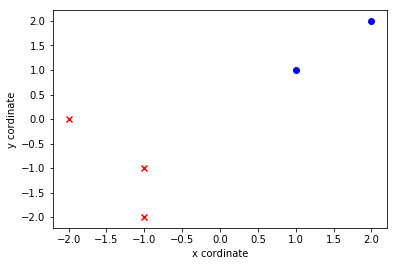

In [561]:
plt.scatter([ele[0] for ele in C_p], [ele[1] for ele in C_p] , color='b',marker='o')
plt.scatter([ele[0] for ele in C_n], [ele[1] for ele in C_n] , color='r',marker='x')
plt.xlabel('x cordinate')
plt.ylabel('y cordinate')
# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

-2 -2
-1.559753881608117e-08
-2 -1
0.49968138117703154
-2 0
0.9993627779516021
-2 1
1.4990441747261727
-1 -2
0.5003186032254294
-1 -1
1.0000000000000002
-1 0
1.4996813967745708
-1 1
1.9993627935491414
0 -2
1.0006372220483981
0 -1
1.5003186188229687
0 0
2.0000000155975393
0 1
2.4996814123721096
1 -2
1.5009558408713666
1 -1
2.0006372376459374
1 0
2.5003186344205077
1 1
3.0000000311950785


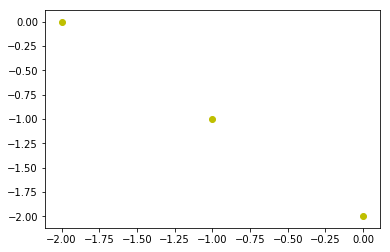

In [615]:
new_range = np.arange(-2,2)
for x1 in new_range:
    for x2 in new_range:
        print(x1,x2)
        g = get_gx(X,D,K,np.array([x1,x2]))
        print(g)
        if (g <= 1.1 and g >= 0.9):
            plt.scatter(x1,x2, color = 'y', marker='o')
        if ((g>=-1.1) and (g<= -0.9)):
            plt.scatter(x1,x2, color = 'g', marker='x')

In [441]:
# get the equation of hyperplane -done
# plot the g(x) functions
# then mix matcth hyperplance equations -done tried poly, linear, gaussian